In [93]:
import pandas as pd 

In [125]:
dataset=pd.read_csv(r"C:\Users\wwrao\OneDrive\Documents\HR_comma_sep.csv")
dataset.head(14999)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [95]:
dataset.shape

(14999, 10)

In [96]:
dataset.drop(columns=["Department"],inplace=True,axis=1)
dataset.drop(columns=["average_montly_hours"],inplace=True,axis=1)

In [97]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'salary'],
      dtype='object')

In [98]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,3,0,1,0,low
1,0.80,0.86,5,6,0,1,0,medium
2,0.11,0.88,7,4,0,1,0,medium
3,0.72,0.87,5,5,0,1,0,low
4,0.37,0.52,2,3,0,1,0,low


In [99]:

dataset["salary"].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [100]:
from sklearn.preprocessing  import LabelEncoder

In [101]:
l=LabelEncoder()

In [102]:
label=l.fit_transform(dataset["salary"])

In [103]:
dataset["salary"]=label

In [104]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,3,0,1,0,1
1,0.80,0.86,5,6,0,1,0,2
2,0.11,0.88,7,4,0,1,0,2
3,0.72,0.87,5,5,0,1,0,1
4,0.37,0.52,2,3,0,1,0,1


In [105]:
dataset["salary"].value_counts()

salary
1    7316
2    6446
0    1237
Name: count, dtype: int64

In [106]:
dataset["Work_accident"].value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [107]:
dataset["left"].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [108]:
import matplotlib.pyplot as plt 
%matplotlib inline 

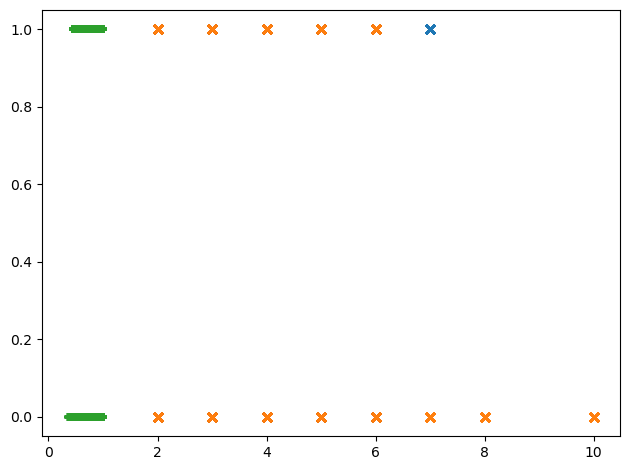

In [109]:
plt.scatter(dataset["number_project"],dataset["left"],marker="x")
plt.scatter(dataset["time_spend_company"],dataset["left"],marker="x")
plt.scatter(dataset["last_evaluation"],dataset["left"],marker="+")
plt.tight_layout()

In [110]:
from sklearn.model_selection import train_test_split


In [111]:
x=dataset.drop(columns=["left"],axis=1)
x

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,3,0,0,1
1,0.80,0.86,5,6,0,0,2
2,0.11,0.88,7,4,0,0,2
3,0.72,0.87,5,5,0,0,1
4,0.37,0.52,2,3,0,0,1
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,3,0,0,1
14995,0.37,0.48,2,3,0,0,1
14996,0.37,0.53,2,3,0,0,1
14997,0.11,0.96,6,4,0,0,1


In [112]:
y=dataset["left"]

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)

In [114]:
x_train.shape,y_train.shape

((2999, 7), (2999,))

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
lor=LogisticRegression()

In [117]:
lor.fit(x_train,y_train)

LogisticRegression()

In [118]:
lor.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [119]:
lor.score(x_test,y_test)*100

76.41666666666667

In [120]:
lor.coef_

array([[-3.99021902,  0.93676386, -0.27853629,  0.22660909, -1.11982766,
        -1.32040808, -0.01826619]])

In [121]:
lor.intercept_

array([0.74309755])

In [124]:
lor.predict_proba(x_test)

array([[0.82993885, 0.17006115],
       [0.92491187, 0.07508813],
       [0.79977744, 0.20022256],
       ...,
       [0.77713383, 0.22286617],
       [0.82642902, 0.17357098],
       [0.3137939 , 0.6862061 ]])